In [1]:
import kachery_p2p as kp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from utils import parse_sf_results
import statsmodels.api as sm

In [2]:
# Load in the data from the sf url
khash = 'sha1://b3444629251cafda919af535f0e9837279151c6e/spikeforest-full-gt-qm.json?manifest=cf73c99d06c11e328e635e14dc24b8db7372db3d'
sf_data = kp.load_json(khash)

In [3]:
#Exclude paired
paired_study_names = list(set([entry['studyName'] for entry in sf_data if 'paired' in entry['studyName']]))

In [4]:
# Returns a dictionary of pandas dataframes, with key study_name
all_data = parse_sf_results(sf_data=sf_data, exclude_study_names=paired_study_names, train_test_split=True, with_agreement_scores=True)

(array([13325.,  2648.,  2582.,  2844.,  3662.,  2834.,  2056.,  2418.,
         3188., 15044.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

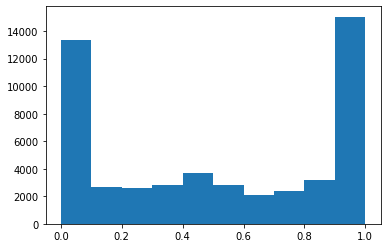

In [5]:
plt.hist(all_data['y_train'])

In [6]:
linear_glm = sm.GLM(all_data['y_train'], all_data['X_train'], family=sm.families.Binomial())
linear_result = linear_glm.fit()

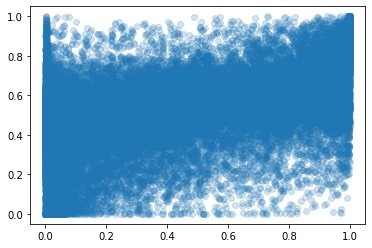

In [7]:
plt.plot(all_data['y_train'], linear_result.predict(all_data['X_train']), 'o', alpha=0.2);

In [ ]:
svr_rbf_model = SVR(kernel='linear')
svr_rbf_model.fit(all_data['X_train'], all_data['y_train'])

In [ ]:
svr_rbf_y_preds = svr_rbf_model.predict(all_data['X_train'])

In [ ]:
plt.scatter(svr_rbf_y_preds, all_data['y_train'])